# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 616


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | lebu
Processing Record 2 of Set 1 | port saint john's
Processing Record 3 of Set 1 | port-aux-francais
Processing Record 4 of Set 1 | karema
Processing Record 5 of Set 1 | whitehorse
Processing Record 6 of Set 1 | fortuna
Processing Record 7 of Set 1 | vilyuchinsk
Processing Record 8 of Set 1 | talnakh
Processing Record 9 of Set 1 | coronel dorrego
Processing Record 10 of Set 1 | hammerfest
Processing Record 11 of Set 1 | longyearbyen
Processing Record 12 of Set 1 | tamandare
Processing Record 13 of Set 1 | port mathurin
Processing Record 14 of Set 1 | albany
Processing Record 15 of Set 1 | college
Processing Record 16 of Set 1 | nabire
Processing Record 17 of Set 1 | puerto natales
Processing Record 18 of Set 1 | lashio
Processing Record 19 of Set 1 | yanam
Processing Record 20 of Set 1 | mar del plata
Processing Record 21 of Set 1 | avarua
Processing Record 22 of Set 1 | adamstown
Processing Re

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          589
Lat           589
Lng           589
Max Temp      589
Humidity      589
Cloudiness    589
Wind Speed    589
Country       589
Date          589
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,lebu,-37.6167,-73.6500,288.58,76,72,1.95,CL,1701093823
1,port saint john's,-31.6229,29.5448,299.43,72,8,3.67,ZA,1701093850
2,port-aux-francais,-49.3500,70.2167,277.80,76,66,7.78,TF,1701093767
3,karema,-6.8205,30.4389,296.29,83,74,3.07,TZ,1701093956
4,whitehorse,60.7161,-135.0538,276.58,48,20,5.14,CA,1701093783


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,lebu,-37.6167,-73.6500,288.58,76,72,1.95,CL,1701093823
1,port saint john's,-31.6229,29.5448,299.43,72,8,3.67,ZA,1701093850
2,port-aux-francais,-49.3500,70.2167,277.80,76,66,7.78,TF,1701093767
3,karema,-6.8205,30.4389,296.29,83,74,3.07,TZ,1701093956
4,whitehorse,60.7161,-135.0538,276.58,48,20,5.14,CA,1701093783


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

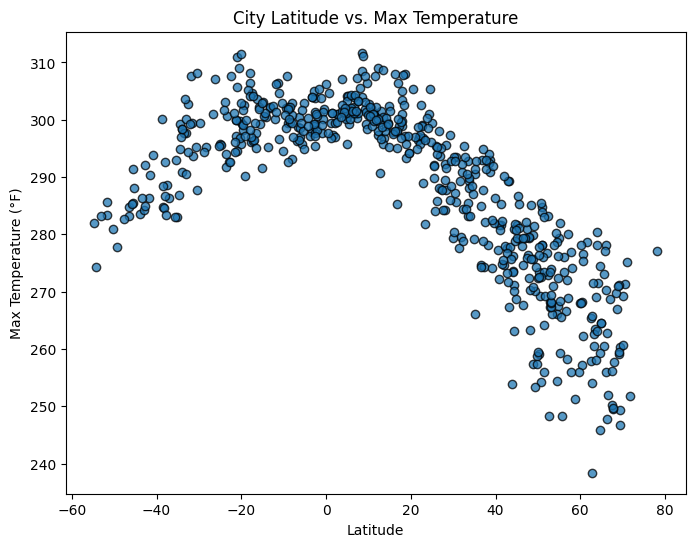

In [8]:
# Build scatter plot for latitude vs. temperature
plt.figure(figsize=(8, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°F)")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

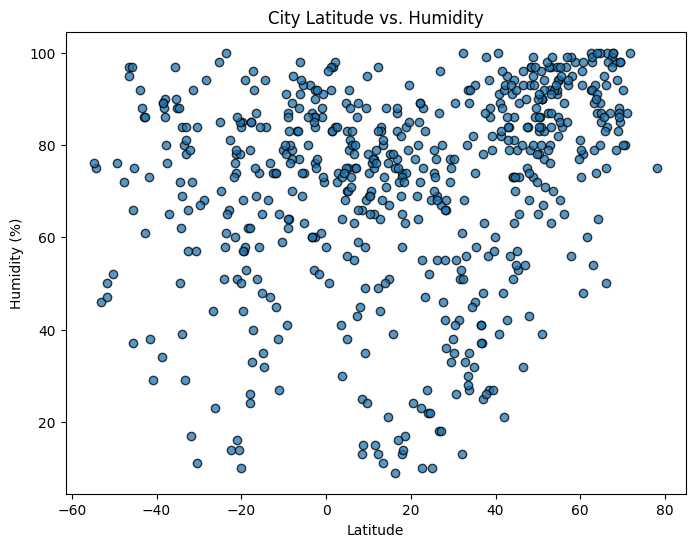

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.figure(figsize=(8, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

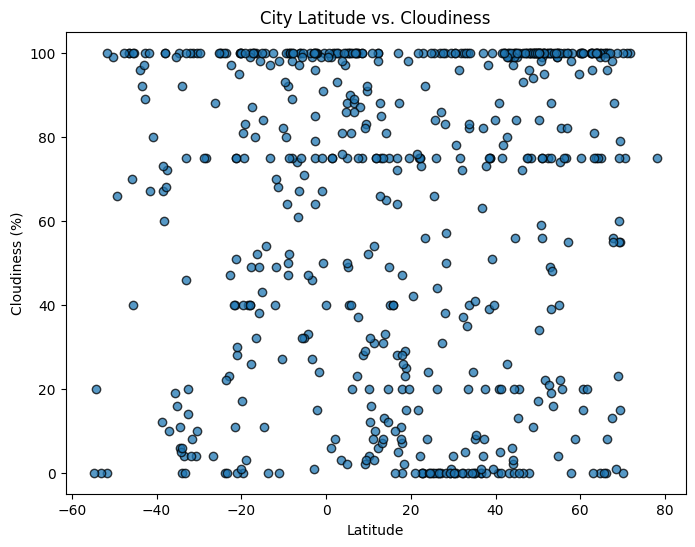

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.figure(figsize=(8, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

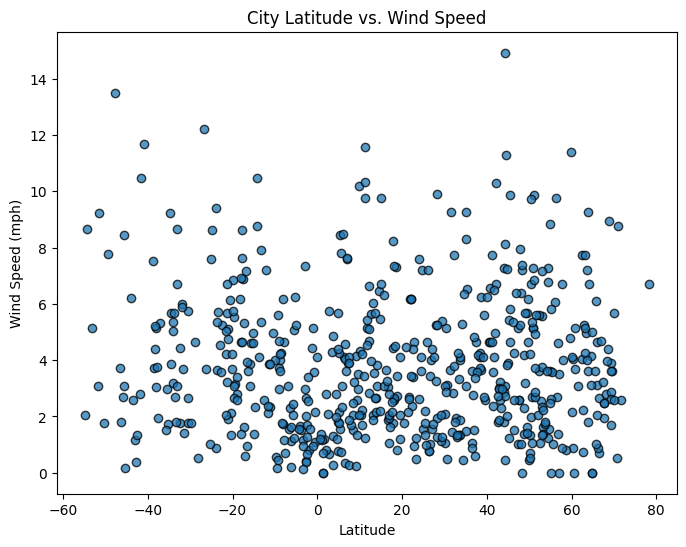

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.figure(figsize=(8, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, x_label, y_label, title, text_coordinates):
    slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
    
    regress_values = x_values * slope + intercept

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,whitehorse,60.7161,-135.0538,276.58,48,20,5.14,CA,1701093783
5,fortuna,40.5982,-124.1573,277.34,100,0,4.63,US,1701093896
6,vilyuchinsk,52.9306,158.4028,268.11,80,49,5.55,RU,1701093794
7,talnakh,69.4865,88.3972,249.35,98,55,3.62,RU,1701093767
9,hammerfest,70.6634,23.6821,271.40,80,75,0.51,NO,1701093896


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,lebu,-37.6167,-73.6500,288.58,76,72,1.95,CL,1701093823
1,port saint john's,-31.6229,29.5448,299.43,72,8,3.67,ZA,1701093850
2,port-aux-francais,-49.3500,70.2167,277.80,76,66,7.78,TF,1701093767
3,karema,-6.8205,30.4389,296.29,83,74,3.07,TZ,1701093956
8,coronel dorrego,-38.7187,-61.2873,300.10,34,12,7.51,AR,1701093957


###  Temperature vs. Latitude Linear Regression Plot

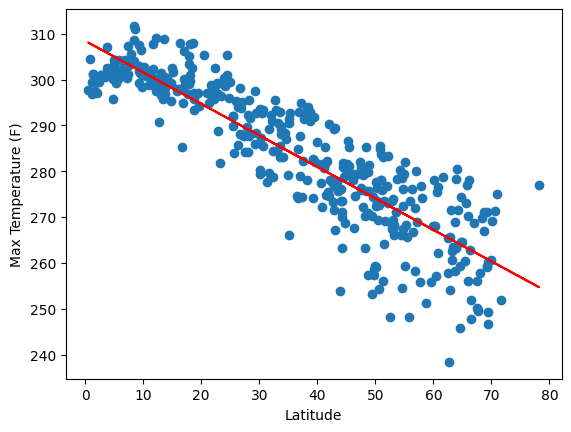

In [15]:
# Linear regression on Northern Hemisphere
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], label="Data")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
slope, intercept, r_value, p_value, std_err = linregress(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])
regress_line = slope * northern_hemi_df["Lat"] + intercept
plt.plot(northern_hemi_df["Lat"], regress_line, color="red", label="Regression Line")


plt.show()

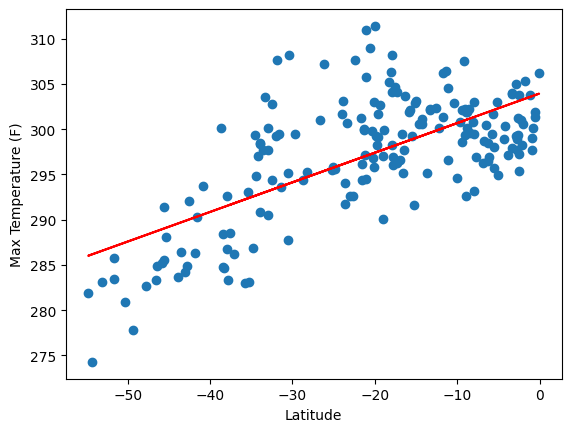

In [16]:
# Linear regression on Southern Hemisphere
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], label="Data")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
slope, intercept, r_value, p_value, std_err = linregress(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])
regress_line = slope * southern_hemi_df["Lat"] + intercept
plt.plot(southern_hemi_df["Lat"], regress_line, color="red", label="Regression Line")
plt.annotate(regress_line,(20,5),fontsize=15,color="red")

plt.show()

**Discussion about the linear relationship:** The plots show that there's more of a negative relationship for the Northern Hemisphere data, whereas the relationship between the latitude and temperature for the Southern Hemisphere is more positive. As such, the negative relationship of the Northern Hemisphere shows that the higher the latitude, the lower the temperature. The opposite is true for the plot for the Southern Hemisphere, where as the temperature gets warmer as it approaches the equator.

### Humidity vs. Latitude Linear Regression Plot

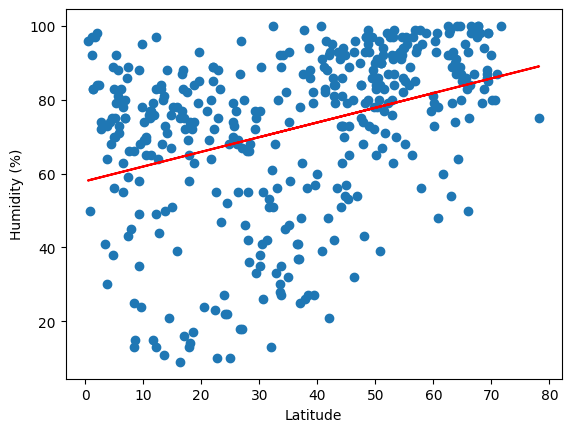

In [17]:
# Northern Hemisphere
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], label="Data")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
slope, intercept, r_value, p_value, std_err = linregress(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])
regress_line = slope * northern_hemi_df["Lat"] + intercept
plt.plot(northern_hemi_df["Lat"], regress_line, color="red", label="Regression Line")

plt.show()

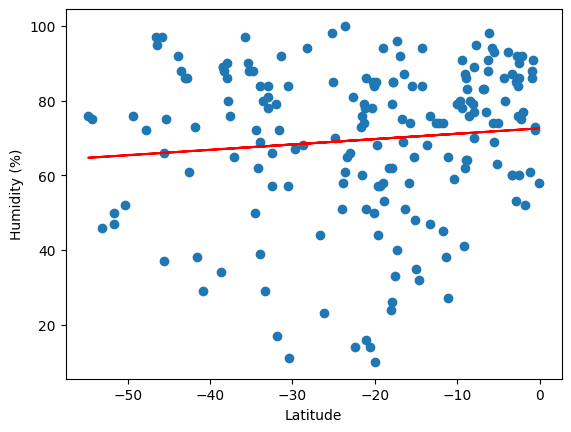

In [18]:
# Southern Hemisphere
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], label="Data")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
slope, intercept, r_value, p_value, std_err = linregress(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])
regress_line = slope * southern_hemi_df["Lat"] + intercept
plt.plot(southern_hemi_df["Lat"], regress_line, color="red", label="Regression Line")

plt.show()

**Discussion about the linear relationship:** For these plots, there is a positive relationship in for both the Northern and Southern Hemispheres as seen with the regression line, however, the relationship is not as strong as it was for the Temperature vs Latitude.

### Cloudiness vs. Latitude Linear Regression Plot

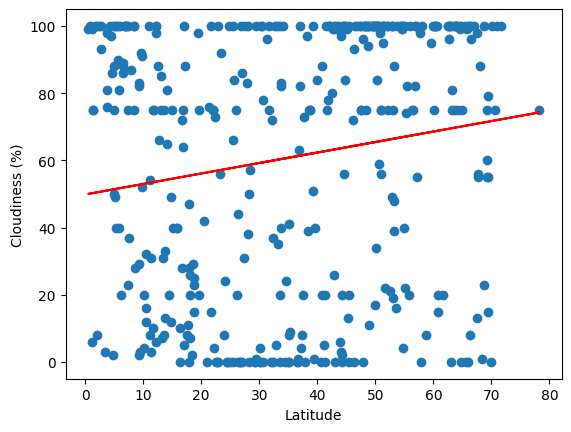

In [19]:
# Northern Hemisphere
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], label="Data")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
slope, intercept, r_value, p_value, std_err = linregress(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])
regress_line = slope * northern_hemi_df["Lat"] + intercept
plt.plot(northern_hemi_df["Lat"], regress_line, color="red", label="Regression Line")

plt.show()

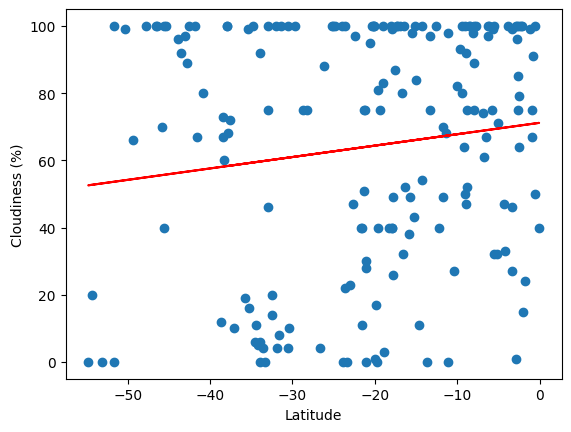

In [20]:
# Southern Hemisphere
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], label="Data")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
slope, intercept, r_value, p_value, std_err = linregress(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])
regress_line = slope * southern_hemi_df["Lat"] + intercept
plt.plot(southern_hemi_df["Lat"], regress_line, color="red", label="Regression Line")
plt.annotate(regress_line,(20,5),fontsize=15,color="red")

plt.show()

**Discussion about the linear relationship:** For the plots for Cloudiness vs Latitude, there seems to be a positive relationship shown on the plots, based off of the regression line. The plots, however, seems very scattered up until you get closer to 0. 

### Wind Speed vs. Latitude Linear Regression Plot

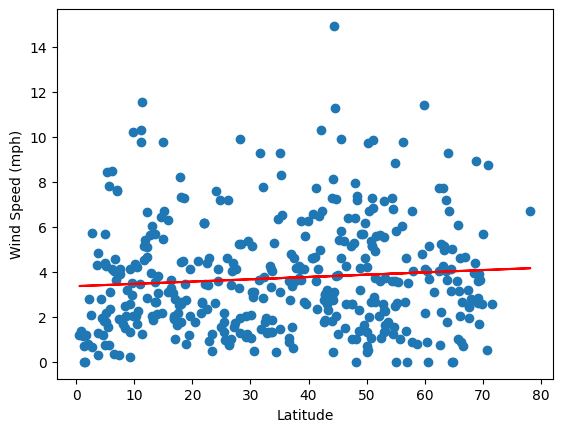

In [21]:
# Northern Hemisphere
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], label="Data")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
slope, intercept, r_value, p_value, std_err = linregress(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])
regress_line = slope * northern_hemi_df["Lat"] + intercept
plt.plot(northern_hemi_df["Lat"], regress_line, color="red", label="Regression Line")

plt.show()

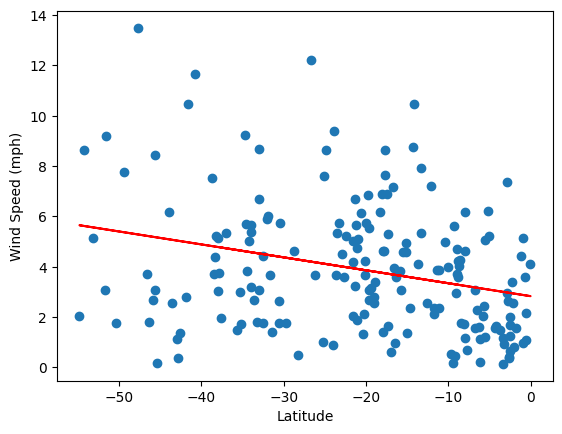

In [22]:
# Southern Hemisphere
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], label="Data")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
slope, intercept, r_value, p_value, std_err = linregress(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])
regress_line = slope * southern_hemi_df["Lat"] + intercept
plt.plot(southern_hemi_df["Lat"], regress_line, color="red", label="Regression Line")


plt.show()

**Discussion about the linear relationship:** Much like Cloudiness vs Latitude, Wind Speed vs Latitude has similar plot locations, however, there are some differences. The latitude for the Southern Hemisphere is negative, but with not as strong of plot points. The Northern Hemisphere, however, slightly trends towards positive, and the plot points are gathered more closely to the regression line.
